In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored  # Renkli çıktılar için

# Görsel ayarları
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

# Veri yolu (Proje yapınıza göre güncelleyin)
DATA_PATH = r"C:\Users\PC\Desktop\fraud_eye\data\raw\creditcard.csv"

In [4]:
try:
    df = pd.read_csv(DATA_PATH)
    print(colored("✅ Veri başarıyla yüklendi!", "green"))
except Exception as e:
    print(colored(f"❌ Hata: {e}", "red"))

✅ Veri başarıyla yüklendi!


In [5]:
display(df.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print(colored("\n🔍 TEMEL BİLGİLER:", "blue"))
print(f"Satır sayısı: {df.shape[0]}")
print(f"Sütun sayısı: {df.shape[1]}")
print(f"Eksik değerler: {df.isnull().sum().sum()}")
print(f"Tekrar eden işlemler: {df.duplicated().sum()}")


🔍 TEMEL BİLGİLER:
Satır sayısı: 284807
Sütun sayısı: 31
Eksik değerler: 0
Tekrar eden işlemler: 1081


In [7]:
class_dist = df['Class'].value_counts(normalize=True) * 100

# Renkli çıktı
print(colored(f"\n🔥 SINIF DAĞILIMI (0: Normal, 1: Fraud):", "yellow"))
print(f"Normal İşlemler: {class_dist[0]:.4f}%")
print(f"Dolandırıcılık: {class_dist[1]:.4f}%")


🔥 SINIF DAĞILIMI (0: Normal, 1: Fraud):
Normal İşlemler: 99.8273%
Dolandırıcılık: 0.1727%


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727,25.845703
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,13.184831
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,15.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,23.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,38.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,47.000000


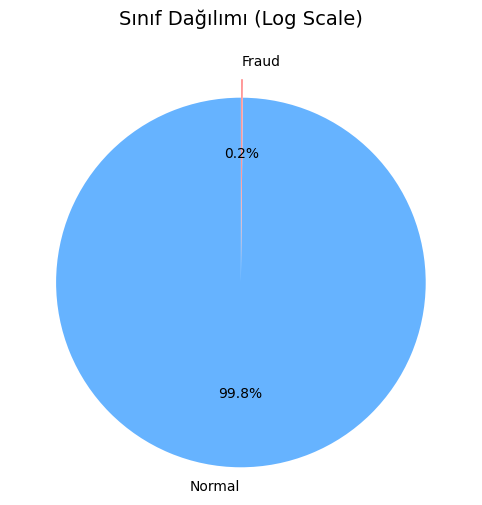

In [17]:
plt.figure(figsize=(8, 6))
plt.pie(class_dist, 
        labels=['Normal', 'Fraud'], 
        colors=['#66b3ff','#ff9999'],
        autopct='%1.1f%%',
        startangle=90,
        explode=(0.1, 0))
plt.title("Sınıf Dağılımı (Log Scale)", fontsize=14)
plt.show()

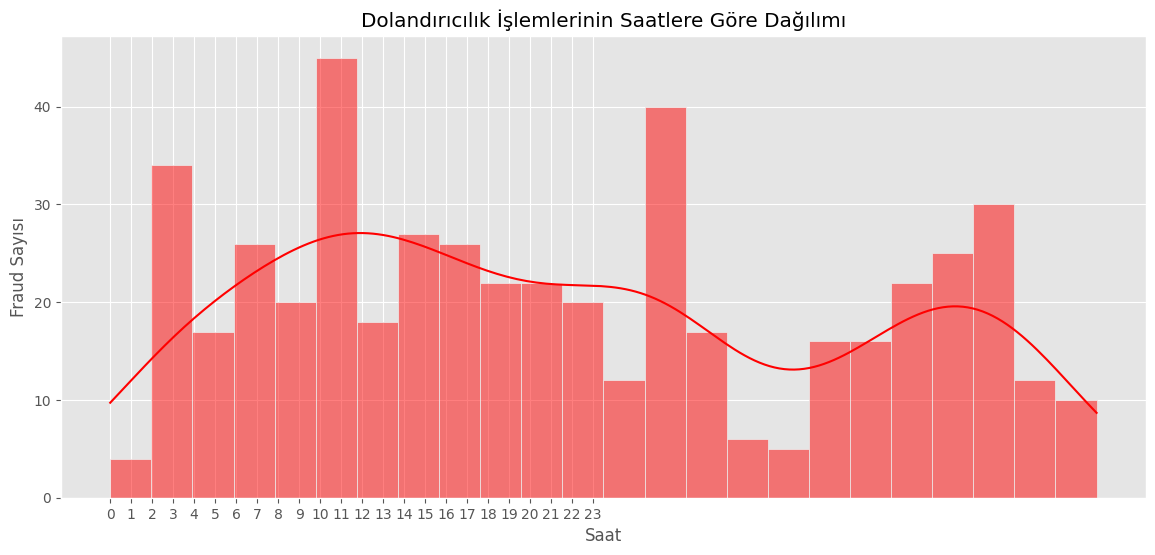

In [18]:
df['Hour'] = df['Time'] // 3600

# Fraud işlemlerin saatlik dağılımı
plt.figure(figsize=(14, 6))
sns.histplot(data=df[df['Class'] == 1], 
             x='Hour', 
             bins=24,
             kde=True,
             color='red')
plt.xticks(range(0, 24))
plt.title("Dolandırıcılık İşlemlerinin Saatlere Göre Dağılımı")
plt.xlabel("Saat")
plt.ylabel("Fraud Sayısı")
plt.show()

In [19]:
fraud_stats = df[df['Class'] == 1]['Amount'].describe()
normal_stats = df[df['Class'] == 0]['Amount'].describe()

print(colored("\n📊 TUTAR İSTATİSTİKLERİ:", "blue"))
print(colored("\nFraud İşlemler:", "red"))
display(fraud_stats)

print(colored("\nNormal İşlemler:", "green"))
display(normal_stats)


📊 TUTAR İSTATİSTİKLERİ:

Fraud İşlemler:


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Normal İşlemler:


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

C:\Users\PC\AppData\Local\Temp\ipykernel_7580\3618754489.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class',


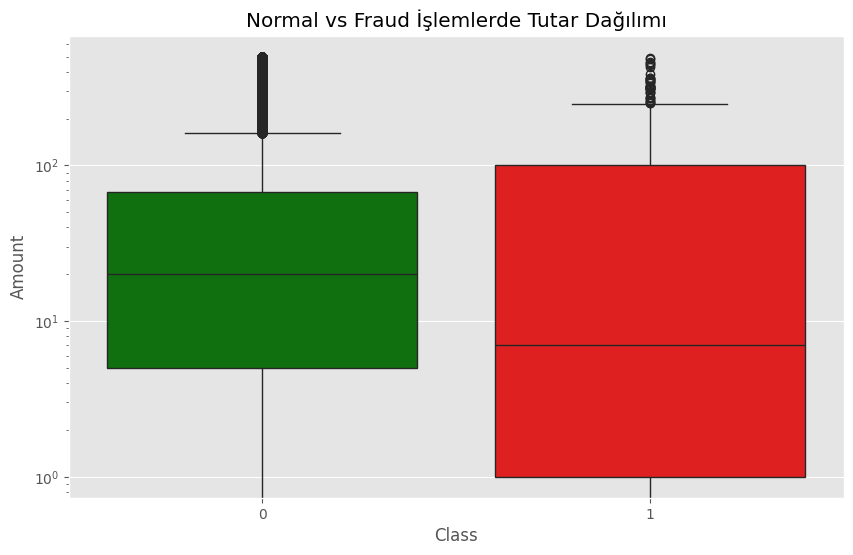

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', 
            y='Amount', 
            data=df[df['Amount'] < 500],  # Aykırı değerleri filtrele
            palette=['green', 'red'])
plt.title("Normal vs Fraud İşlemlerde Tutar Dağılımı")
plt.yscale('log')
plt.show()

In [ ]:
# Her sütun için Point-Biserial korelasyonunu hesapla
from scipy.stats import pointbiserialr
corr_results = {}
for col in df.columns:
    if col != 'Class':  # Class'ı kendisiyle kıyaslamayalım
        corr, p_value = pointbiserialr(df[col], df['Class'])
        corr_results[col] = corr

# Korelasyonları DataFrame'e çevir ve sırala
corr_series = pd.Series(corr_results).sort_values(ascending=False)
print("Point-Biserial Korelasyonu:\n", corr_series.head(10))

# Görselleştirme
plt.figure(figsize=(12, 6))
corr_series.plot(kind='bar', color='purple')
plt.title("Özelliklerin Fraud ile Korelasyonu (Point-Biserial)")
plt.ylabel("Korelasyon Katsayısı")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

AttributeError: 'numpy.float64' object has no attribute 'sort_values'

In [ ]:
# Fraud işlemlerde en yüksek korelasyona sahip özellikler
fraud_corr = df[df['Class'] == 1].corr()['Class'].sort_values(ascending=False)
print(colored("\n🎯 Fraud ile En Yüksek Korelasyona Sahip Özellikler:", "yellow"))
display(fraud_corr.head(10))


🎯 Fraud ile En Yüksek Korelasyona Sahip Özellikler:


Time   NaN
V1     NaN
V2     NaN
V3     NaN
V4     NaN
V5     NaN
V6     NaN
V7     NaN
V8     NaN
V9     NaN
Name: Class, dtype: float64

In [ ]:
# Spearman korelasyonu
corr_spearman = df.corr(method='spearman')['Class'].sort_values(ascending=False)
print("Spearman Korelasyonu:\n", corr_spearman.head(10))



Spearman Korelasyonu:
 Class    1.000000
V4       0.063045
V11      0.060143
V2       0.051062
V21      0.035442
V27      0.028311
V8       0.022706
V19      0.022546
V20      0.021574
V28      0.020417
Name: Class, dtype: float64


In [ ]:
# Kendall Tau
corr_kendall = df.corr(method='kendall')['Class'].sort_values(ascending=False)
print("\nKendall Tau Korelasyonu:\n", corr_kendall.head(10))


Kendall Tau Korelasyonu:
 Class    1.000000
V4       0.051476
V11      0.049107
V2       0.041692
V21      0.028938
V27      0.023116
V8       0.018540
V19      0.018409
V20      0.017615
V28      0.016671
Name: Class, dtype: float64


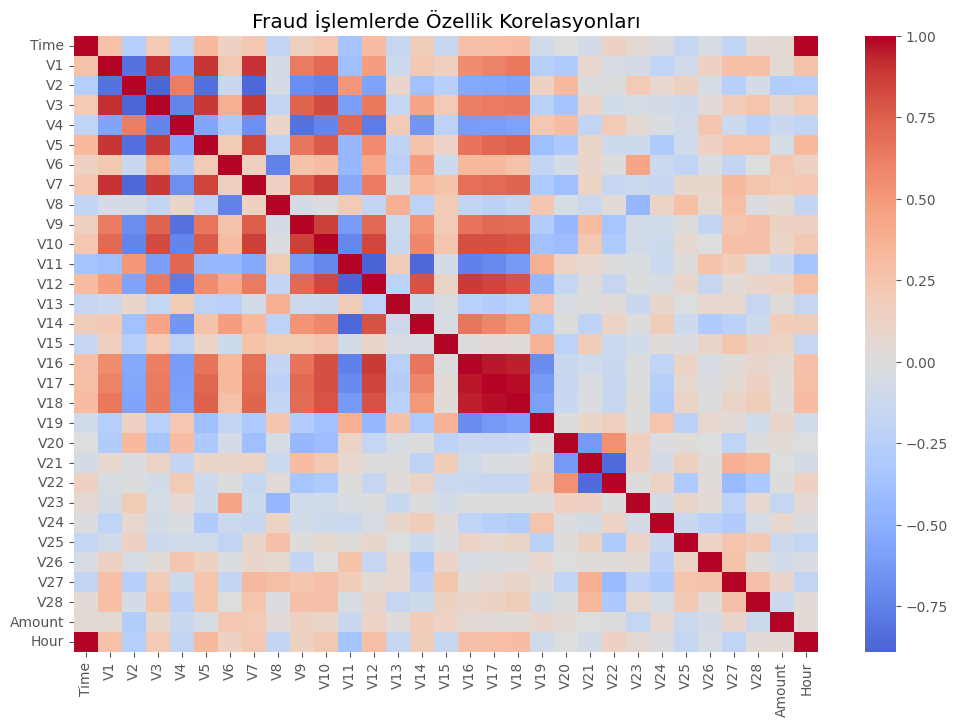

In [ ]:
# Fraud işlemlerde korelasyon
fraud_corr = df[df['Class'] == 1].drop(['Class'], axis=1).corr()

# Isı haritası
plt.figure(figsize=(12, 8))
sns.heatmap(fraud_corr, cmap='coolwarm', center=0)
plt.title("Fraud İşlemlerde Özellik Korelasyonları")
plt.show()

## özel deneme

In [ ]:
# Tek hücrede özet fonksiyon
def quick_eda(df):
    """Hızlı EDA raporu üretir"""
    from IPython.display import display
    print(f"📊 Shape: {df.shape}")
    print(f"🔍 Null Values: {df.isnull().sum().sum()}")
    display(df.describe().T)
    display(df['Class'].value_counts(normalize=True))
    
quick_eda(df)

📊 Shape: (284807, 32)
🔍 Null Values: 0


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64